# **Tweet_Emotion-Decoder--(SVM)--**😁/😒/😠/😥/😔

`Text classification task using SVMs to detect emotions in tweets.`



# *   Imports ----- and prelim steps




In [9]:
# ✅ Step 1: Imports
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score



In [2]:
df = pd.read_csv("emotions.csv")
df.head()


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
print(df['label'].value_counts())


label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


# **Pre-Processing and Training**



```
since training this huge dataset is gonna take a lotta time..
we're gonna resort to various techniques like training on a subset of the
dataset and also using linear-svc for linear kernel and stuff.
```




---



---



In [37]:
# ✅ Step 1: imports

# ✅ Step 2: Load and Subsample
df = pd.read_csv("emotions.csv")
df_small = df.sample(n=30000, random_state=42).copy()

# ✅ Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_small['clean_text'] = df_small['text'].apply(clean_text)

# ✅ Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df_small['clean_text'])

# ✅ Step 5: Encode Labels
le = LabelEncoder()
y = le.fit_transform(df_small['label'])

# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 7: Train and Compare Kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\n🔍 Training with kernel = {kernel}")

    if kernel == 'linear':
        model = LinearSVC()
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)

    results[kernel] = {
        'model': model,
        'accuracy': acc,
        'report': report
    }

    print(f"✅ Accuracy: {acc:.4f}")
    target_names = [str(c) for c in le.classes_]
    print(classification_report(y_test, y_pred, target_names=target_names))





🔍 Training with kernel = linear
✅ Accuracy: 0.8992
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1696
           1       0.91      0.93      0.92      2068
           2       0.80      0.78      0.79       496
           3       0.91      0.89      0.90       809
           4       0.87      0.85      0.86       701
           5       0.77      0.79      0.78       230

    accuracy                           0.90      6000
   macro avg       0.87      0.86      0.86      6000
weighted avg       0.90      0.90      0.90      6000


🔍 Training with kernel = rbf
✅ Accuracy: 0.8810
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1696
           1       0.87      0.95      0.91      2068
           2       0.84      0.66      0.74       496
           3       0.93      0.84      0.88       809
           4       0.85      0.83      0.84       701
           5       0.81      0.

# **Scores -->  ◻/💯**


---





In [38]:
# ✅ Print Summary Table
for kernel in kernels:
    acc = results[kernel]['accuracy']
    f1 = results[kernel]['report']['macro avg']['f1-score']
    print(f"{kernel.upper():<10} | Accuracy: {acc:.4f} | F1-score: {f1:.4f}")


LINEAR     | Accuracy: 0.8992 | F1-score: 0.8646
RBF        | Accuracy: 0.8810 | F1-score: 0.8308
POLY       | Accuracy: 0.6772 | F1-score: 0.4890
SIGMOID    | Accuracy: 0.8928 | F1-score: 0.8535


#**Results---->🏁**


---



In [39]:
best_kernel = max(results, key=lambda k: results[k]['accuracy'])
print(f"\n🏆 Best Kernel: {best_kernel}")



🏆 Best Kernel: linear


# **Visualizations ---- 📊**


---



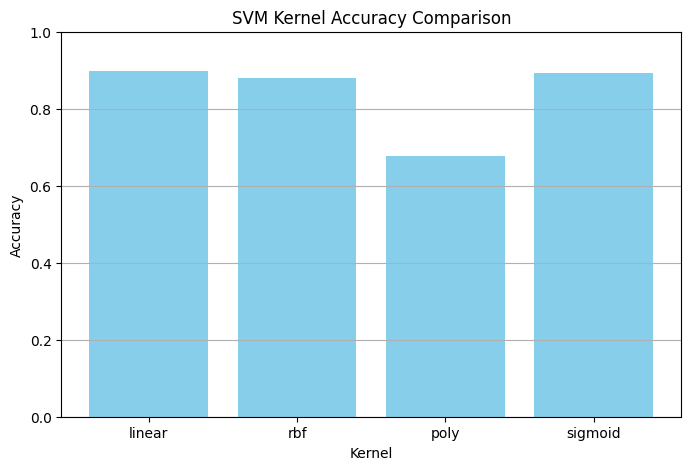

In [40]:
import matplotlib.pyplot as plt

# Extract kernels and accuracies
kernels = list(results.keys())
accuracies = [results[k]['accuracy'] for k in kernels]

plt.figure(figsize=(8,5))
plt.bar(kernels, accuracies, color='skyblue')
plt.title('SVM Kernel Accuracy Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# **The metrics for each emotion class individually**


---



In [41]:
for emotion_label in le.classes_:
    label = int(emotion_label)  # convert string label to int
    metrics = linear_report[label]
    print(f"Emotion {emotion_label}:")
    print(f"  Precision: {metrics['precision']:.3f}")
    print(f"  Recall:    {metrics['recall']:.3f}")
    print(f"  F1-score:  {metrics['f1-score']:.3f}")
    print(f"  Support:   {metrics['support']}")
    print()



Emotion 0:
  Precision: 0.932
  Recall:    0.926
  F1-score:  0.929
  Support:   1175.0

Emotion 1:
  Precision: 0.893
  Recall:    0.924
  F1-score:  0.908
  Support:   1359.0

Emotion 2:
  Precision: 0.770
  Recall:    0.741
  F1-score:  0.756
  Support:   321.0

Emotion 3:
  Precision: 0.895
  Recall:    0.883
  F1-score:  0.889
  Support:   548.0

Emotion 4:
  Precision: 0.834
  Recall:    0.850
  F1-score:  0.842
  Support:   448.0

Emotion 5:
  Precision: 0.824
  Recall:    0.658
  F1-score:  0.731
  Support:   149.0

